<a href="https://colab.research.google.com/github/NasreenDudekula/Projectss/blob/main/Mielage_Prediction_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt


# Import Data

In [1]:

import seaborn as sns

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Values

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

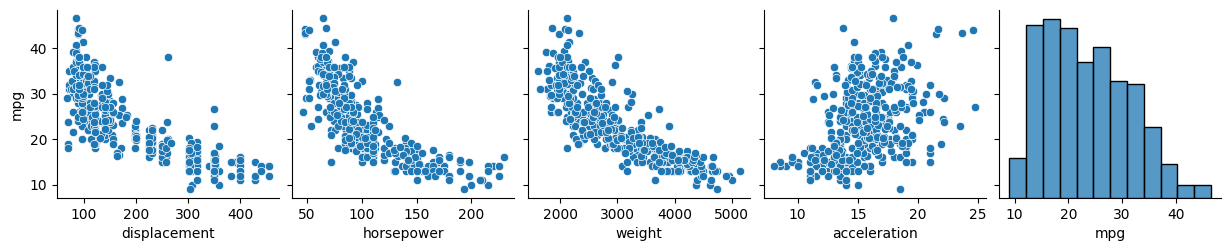

In [15]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

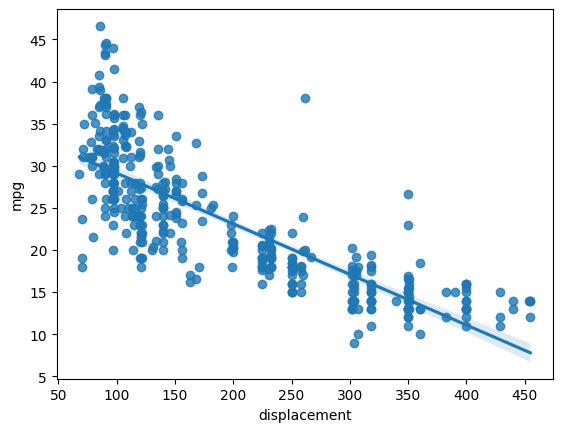

In [16]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# Define Target Variable y and Feature X

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
y = df['mpg']

In [19]:
y.shape

(392,)

In [20]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [21]:
x.shape

(392, 4)

# Scaling Data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
x = ss.fit_transform(x)

In [25]:
pd.DataFrame(x).describe()


,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Train Test Split Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [29]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [33]:
lr.intercept_

23.16376632761734

In [34]:
lr.coef_

array([-1.01922167, -2.14812933, -3.87346046, -0.33559727])

# Predict Test Data

In [35]:
y_pred = lr.predict(xtest)

In [36]:
y_pred

array([27.65933851, 20.06237301, 29.2228188 , 30.45735157, 21.96618283,
       20.45115596, 21.00466917, 26.48454429, 17.58928433, 17.8138635 ,
       26.35215149, 14.7592678 , 20.46913202, 30.88962114, 15.77327835,
       23.0297112 , 30.71844999, 19.8177085 , 26.58695171, 25.78373881,
       29.81250803, 27.8025709 , 23.19741356, 22.28340403, 22.0309547 ,
       25.56855317, 31.62674553, 23.72438959, 27.78155515, 16.67635887,
        9.22980536, 28.84520083, 14.91975439, 29.38126638, 23.63411396,
       32.27087871, 27.31792822, 25.54365884, 15.74595512, 15.66465174,
       21.63460407, 24.80042433, 20.50156602, 30.54419044, 23.81669949,
       29.11215264, 27.51294964, 19.78648941, 31.39909272, 29.85908763,
       24.22316758, 29.78109904, 11.22257671, 30.68649251, 18.06268534,
       12.907808  , 25.62861282, 28.82681371, 28.69037065,  9.35691179,
       22.34249478, 22.70009981, 30.23589349, 15.00461345, 25.20386707,
       27.30154732, 15.16364435, 21.73244488, 29.70969345, 29.10

# Model Accuracy

In [37]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [38]:
mean_absolute_error(ytest, y_pred)

3.355009407495103

In [39]:
mean_absolute_percentage_error(ytest, y_pred)

0.1465725573441237

In [40]:
r2_score(ytest, y_pred)

0.7070681290734958

# Polynomial Regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [43]:
x_train2 = poly.fit_transform(xtrain)

In [44]:
x_test2 = poly.fit_transform(xtest)

In [45]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [46]:
lr.intercept_

21.000661879123648

In [47]:
lr.coef_

array([-2.74110293, -6.14345172, -0.70023539, -1.71409581,  0.96595571,
       -0.20411753, -0.37217163,  1.43236743, -1.04614303,  1.18074181])

In [48]:
y_pred_poly = lr.predict(x_test2)

# Model Accuracy

In [49]:
mean_absolute_error(ytest, y_pred_poly)

3.1250850575964595

In [50]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.13374596514503412

In [51]:
r2_score(ytest, y_pred_poly)

0.7451041593137353